In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('../results/metrics.csv')
df = df[~df['data-name'].isin(['NATOPS', 'ArticularyWordRecognition', 'ERing'])]

In [3]:
df

,data-name,model-accuracy,validity,proximity,compactness,surrogte-accuracy,surrogates-cross-entropy,outlier-factor,method,validity-rank,proximity-rank,compactness-rank
0,TwoLeadECG,0.997366,0.600000,0.230322,0.778746,0.434783,-0.338688,1.000000,borf,3.0,2.0,1.0
1,GunPoint,1.000000,0.540000,0.255823,0.690617,1.000000,-0.045759,1.000000,borf,2.0,3.0,2.0
2,Earthquakes,0.683453,0.140000,0.175138,0.699369,0.816770,-0.515944,0.974359,borf,2.0,2.0,2.0
3,Coffee,1.000000,0.607143,0.191042,0.762937,0.928571,-0.099827,0.933333,borf,1.0,2.0,1.0
4,Wine,0.462963,0.320000,0.051756,0.880845,0.508772,-0.368663,1.000000,borf,2.0,3.0,2.0
5,ItalyPowerDemand,0.966958,0.460000,0.588935,0.500000,0.507463,-0.345452,1.000000,borf,2.0,2.0,1.0
7,BasicMotions,0.500000,0.000000,0.107198,0.925152,1.000000,-0.081500,1.000000,borf,2.0,1.0,1.0
8,Cricket,0.236111,0.300000,0.285294,0.910834,0.768519,-0.267135,1.000000,borf,2.0,1.0,1.0
9,Epilepsy,0.304348,0.160000,0.371963,0.870135,0.956204,-0.371627,0.948718,borf,2.0,1.0,1.0
11,RacketSports,0.368421,0.160000,0.571419,0.846991,0.562914,-0.259905,1.000000,borf,3.0,2.0,2.0


In [4]:
UNI_DATASETS: list[str] = [
    "TwoLeadECG",  # 0
    "GunPoint",  # 1
    "Earthquakes",  # 2
    "Coffee",  # 3
    "Wine",  # 4
    "ItalyPowerDemand",  # 5
]

MULTI_DATASETS: list[str] = [
    "ArticularyWordRecognition",  # 6
    "BasicMotions",  # 7
    "Cricket",  # 8
    "Epilepsy",  # 9
    "ERing",  # 10
    "NATOPS",  # 11
    "RacketSports",  # 12
]

In [5]:
df['data type'] = df['data-name'].apply(lambda x: 'univariate' if x in UNI_DATASETS else 'multivariate')

In [6]:
method_mapper = {
    'borf': r'MASCOTS, $\lambda=0.1$',
    'borf-no-lambda': r'MASCOTS, $\lambda=0.0$',
    'mcels': 'M-CELS',
    'glacier': 'Glacier'
}

In [7]:
df['method'] = df['method'].apply(lambda x: method_mapper[x])
df = df.rename(columns={'validity': 'Validity', 'proximity': 'Proximity', 'compactness': 'Sparsity', 'outlier-factor': 'Plausibility'})

In [8]:
runtimes = pd.read_csv('../runtimes.csv')

full_df = pd.merge(df, runtimes, on=['data-name', 'method'], how='outer')
full_df.columns

Index(['data-name', 'model-accuracy', 'Validity', 'Proximity', 'Sparsity',
       'surrogte-accuracy', 'surrogates-cross-entropy', 'Plausibility',
       'method', 'validity-rank', 'proximity-rank', 'compactness-rank',
       'data type', 'filename', 'runtime', 'ID', 'data_id'],
      dtype='object')

In [16]:
full_df['runtime'] = pd.to_timedelta(full_df['runtime'])

In [18]:
full_df[['method', 'runtime']].groupby('method').mean()

,runtime
method,
Glacier,0 days 00:25:48.333333333
M-CELS,0 days 00:54:54.692307692
"MASCOTS, $\lambda=0.0$",0 days 00:29:50.846153846
"MASCOTS, $\lambda=0.1$",0 days 00:23:48


In [42]:
full_df = full_df[['method','data-name', 'model-accuracy', 'surrogte-accuracy', 'Validity',
         'Proximity', 'Sparsity', 'Plausibility', 'runtime']]
full_df = full_df.sort_values('method', ascending=False)
full_df.to_csv('experiment_summary.csv', index=False, float_format="%.2f")

In [43]:
df.to_csv('metrics.csv', index=False)

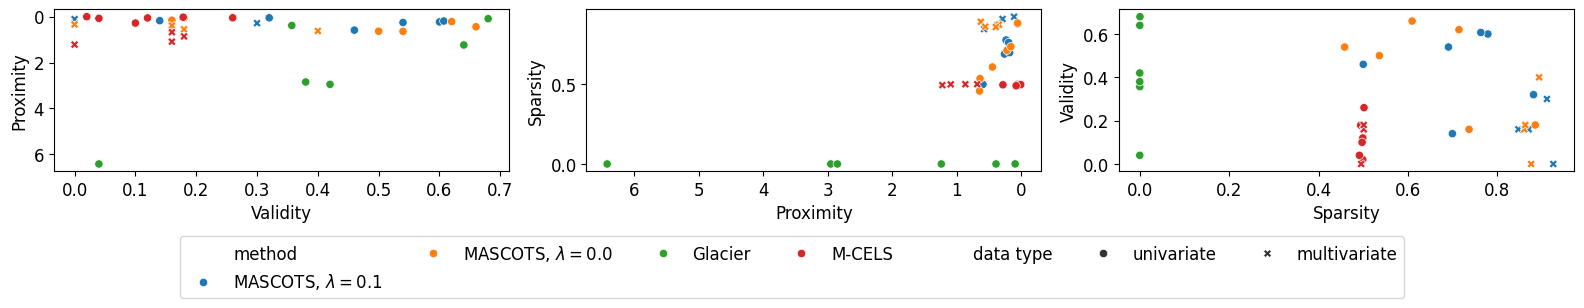

In [44]:
fig, axs = plt.subplots(ncols=3, figsize=(16, 3))

sns.scatterplot(df, x='Validity', y='Proximity', hue='method', style='data type', ax=axs[0], legend=True)
sns.scatterplot(df, x='Proximity', y='Sparsity', hue='method', style='data type', ax=axs[1], legend=False)
sns.scatterplot(df, x='Sparsity', y='Validity', hue='method', style='data type', ax=axs[2], legend=False)

axs[0].invert_yaxis()
axs[1].invert_xaxis()

handles, labels = axs[0].get_legend_handles_labels()  # Get legend items from one plot
axs[0].get_legend().remove()

fig.tight_layout()
fig.legend(handles, labels, loc="lower center", ncols=7, bbox_to_anchor=(0.5, -0.05), title=None)
fig.subplots_adjust(bottom=0.4)
plt.show()

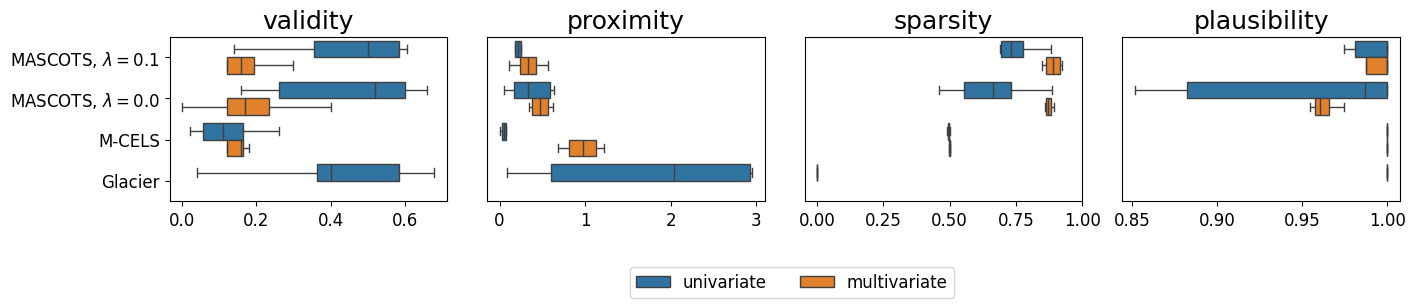

In [105]:
import matplotlib
matplotlib.rcParams.update({'font.size': 12})

fig, axs = plt.subplots(ncols=4, figsize=(16, 3))

sns.boxplot(df.sort_values('method', ascending=False), y='method', x='Validity', hue='data type', ax=axs[0], showfliers=False)
sns.boxplot(df.sort_values('method', ascending=False), y='method', x='Proximity', hue='data type', ax=axs[1], legend=False, showfliers=False)
sns.boxplot(df.sort_values('method', ascending=False), y='method', x='Sparsity', hue='data type', ax=axs[2], legend=False, showfliers=False)
sns.boxplot(df.sort_values('method', ascending=False), y='method', x='Plausibility', hue='data type', ax=axs[3], legend=False, showfliers=False)

axs[0].set_title('validity', fontsize=18)
axs[1].set_title('proximity', fontsize=18)
axs[2].set_title('sparsity', fontsize=18)
axs[3].set_title('plausibility', fontsize=18)


handles, labels = axs[0].get_legend_handles_labels()  # Get legend items from one plot
axs[0].get_legend().remove()
axs[0].set_ylabel("")
axs[0].set_xlabel("")

axs[1].set_ylabel("")
axs[1].set_xlabel("")
axs[1].set_yticks([])
axs[2].set_ylabel("")
axs[2].set_yticks([])
axs[2].set_xlabel("")
axs[2].set_xticks([0, 0.25, 0.5, 0.75, 1])
axs[3].set_ylabel("")
axs[3].set_yticks([])
axs[3].set_xlabel("")

fig.tight_layout()
fig.legend(handles, labels, loc="lower center", ncols=7, bbox_to_anchor=(0.5, -0.05), title=None)
fig.subplots_adjust(bottom=0.3, right=0.88)
plt.show()
fig.savefig('plot.svg')

In [102]:
df[['method', 'Validity', 'Proximity', 'Sparsity', 'Plausibility', 'data type']]\
    .groupby(['method', 'data type']).std().reset_index().pivot(index='method', columns='data type').\
        sort_index(ascending=False).swaplevel(axis=1).sort_index(axis=1).astype(str)

data type                       multivariate                       \
                                Plausibility            Proximity   
method                                                              
MASCOTS, $\lambda=0.1$   0.02564102564102561  0.19289042469813195   
MASCOTS, $\lambda=0.0$  0.008592156101155587  0.13336869235581145   
M-CELS                                   0.0  0.23997018899099934   
Glacier                                  nan                  nan   

data type                                                           \
                                     Sparsity             Validity   
method                                                               
MASCOTS, $\lambda=0.1$    0.03606576974113094  0.12261049438499681   
MASCOTS, $\lambda=0.0$   0.015250569011733129  0.16441816606851367   
M-CELS                  0.0027385867177332044  0.08386497083606083   
Glacier                                   nan                  nan   

data type                         univariate                       \
                                Plausibility            Proximity   
method                                                              
MASCOTS, $\lambda=0.1$  0.027135910882713787  0.18092613778981262   
MASCOTS, $\lambda=0.0$    0.2975572099327472   0.2527803053061731   
M-CELS                  0.017749925672341856  0.10033891254952063   
Glacier                                  0.0    2.341558562412741   

data type                                                            
                                      Sparsity             Validity  
method                                                               
MASCOTS, $\lambda=0.1$     0.12715760593304423   0.1834197075443265  
MASCOTS, $\lambda=0.0$      0.1535253922547696  0.21924111536540464  
M-CELS                   0.0037129842978234984  0.08925275582170394  
Glacier                 0.00018174444040891877  0.23062942564380012

In [80]:
mean_df = df[['method', 'Validity', 'Proximity', 'Sparsity', 'Plausibility', 'data type']]\
    .groupby(['method', 'data type']).mean().reset_index().pivot(index='method', columns='data type').\
        sort_index(ascending=False).swaplevel(axis=1).sort_index(axis=1).astype(str).applymap(lambda x: '$' +  x[:4] + ' pm ')
        
std_df = df[['method', 'Validity', 'Proximity', 'Sparsity', 'Plausibility', 'data type']]\
    .groupby(['method', 'data type']).std().reset_index().pivot(index='method', columns='data type').\
        sort_index(ascending=False).swaplevel(axis=1).sort_index(axis=1).astype(str).applymap(lambda x: x[:4] + '$')

/tmp/ipykernel_33106/4258406962.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sort_index(ascending=False).swaplevel(axis=1).sort_index(axis=1).astype(str).applymap(lambda x: '$' +  x[:4] + ' pm ')
/tmp/ipykernel_33106/4258406962.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  sort_index(ascending=False).swaplevel(axis=1).sort_index(axis=1).astype(str).applymap(lambda x: x[:4] + '$')


In [95]:
df[['method', 'Sparsity']].groupby('method').mean(0)

,Sparsity
method,
Glacier,0.000099
M-CELS,0.498010
"MASCOTS, $\lambda=0.0$",0.743079
"MASCOTS, $\lambda=0.1$",0.786562


In [81]:
(mean_df + std_df).sort_index(axis=1, ascending=False)

data type                   univariate                                  \
                              Validity        Sparsity       Proximity   
method                                                                   
MASCOTS, $\lambda=0.1$  $0.44 pm 0.18$  $0.71 pm 0.12$  $0.24 pm 0.18$   
MASCOTS, $\lambda=0.0$  $0.44 pm 0.21$  $0.65 pm 0.15$  $0.35 pm 0.25$   
M-CELS                  $0.11 pm 0.08$  $0.49 pm 0.00$  $0.08 pm 0.10$   
Glacier                 $0.41 pm 0.23$  $9.85 pm 0.00$  $2.32 pm 2.34$   

data type                                 multivariate                  \
                          Plausibility        Validity        Sparsity   
method                                                                   
MASCOTS, $\lambda=0.1$  $0.98 pm 0.02$  $0.15 pm 0.12$  $0.88 pm 0.03$   
MASCOTS, $\lambda=0.0$  $0.84 pm 0.29$  $0.18 pm 0.16$  $0.87 pm 0.01$   
M-CELS                  $0.99 pm 0.01$  $0.12 pm 0.08$  $0.49 pm 0.00$   
Glacier                   $1.0 pm 0.0$    $nan pm nan$    $nan pm nan$   

data type                                               
                             Proximity    Plausibility  
method                                                  
MASCOTS, $\lambda=0.1$  $0.33 pm 0.19$  $0.98 pm 0.02$  
MASCOTS, $\lambda=0.0$  $0.47 pm 0.13$  $0.96 pm 0.00$  
M-CELS                  $0.96 pm 0.23$    $1.0 pm 0.0$  
Glacier                   $nan pm nan$    $nan pm nan$

<Axes: xlabel='method', ylabel='proximity'>

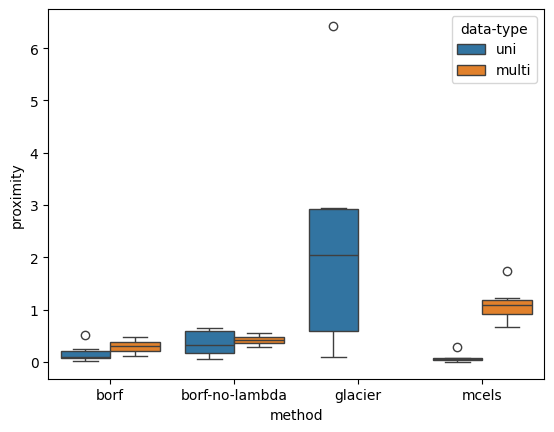

In [12]:
sns.boxplot(df, x='method', y='proximity', hue='data-type')

<Axes: xlabel='method', ylabel='compactness'>

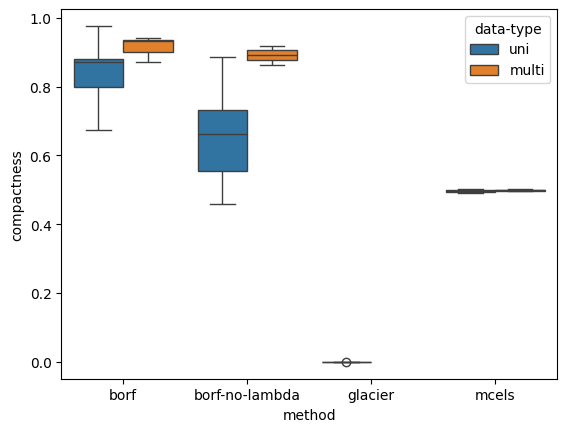

In [13]:
sns.boxplot(df, x='method', y='compactness', hue='data-type')
